In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def free_schechter_luminosity(L, L_star, phi_star, alpha):
    return phi_star * 10 ** (-0.4*(1-alpha)*(L_star-L)) * np.exp(-10.**(-0.4*(L_star-L)))

def free_saunders_luminosity(L, L_star, phi_star, alpha, sigma):
    return phi_star * 10 ** (-0.4*(1-alpha)*(L_star-L)) * np.exp(-1 / (2 * sigma ** 2) * (np.log10(1 + 10 ** (-0.4 * (L_star-L))))**2)

G_L_03 = [8.75, 9.25, 9.75, 10.25, 10.75, 11.25, 11.75, 12.25] # 0.0 < z < 0.3
G_L_04 =                   [10.25, 10.75, 11.25, 11.75, 12.25] # 0.3 < z < 0.45
G_L_06 =                          [10.75, 11.25, 11.75, 12.25] # 0.45 < z < 0.6
G_L_08 =                          [10.75, 11.25, 11.75, 12.25, 12.75] # 0.6 < z < 0.8
G_L_10 =                                 [11.25, 11.75, 12.25, 12.75] # 0.8 < z < 1.0
G_L_12 =                                 [11.25, 11.75, 12.25, 12.75] # 1.0 < z < 1.2
G_L_17 =                                 [11.25, 11.75, 12.25, 12.75, 13.25] # 1.2 < z < 1.7
G_L_20 =                                        [11.75, 12.25, 12.75, 13.25] # 1.7 < z < 2
G_L_25 =                                               [12.25, 12.75, 13.25] # 2 < z < 2.5
G_L_30 =                                               [12.25, 12.75, 13.25, 13.75] # 2.5 < z < 3
G_L_42 =                                                      [12.75, 13.25, 13.75] # 3 < z < 4.2
G_L = [G_L_03, G_L_04, G_L_06, G_L_08, G_L_10, G_L_12, G_L_17, G_L_20, G_L_25, G_L_30, G_L_42]

G_P_03 = [-2.21, -2.18, -2.28, -2.50, -2.71, -3.49, -4.79, -5.27] # 0.0 < z < 0.3
G_P_04 =                      [-2.37, -2.64, -3.12, -4.29, -5.58] # 0.3 < z < 0.45
G_P_06 =                             [-2.61, -2.99, -3.89, -5.50] # 0.45 < z < 0.6
G_P_08 =                             [-2.27, -2.89, -3.53, -4.75, -5.79] # 0.6 < z < 0.8    
G_P_10 =                                    [-3.09, -3.24, -4.23, -5.74] # 0.8 < z < 1.0
G_P_12 =                                    [-2.80, -3.17, -4.00, -5.18] # 1.0 < z < 1.2
G_P_17 =                                    [-2.93, -3.29, -3.81, -4.85, -6.48] # 1.2 < z < 1.7
G_P_20 =                                           [-3.76, -3.96, -4.42, -6.01] # 1.7 < z < 2
G_P_25 =                                                  [-3.53, -4.40, -5.79] # 2 < z < 2.5
G_P_30 =                                                  [-3.75, -4.15, -5.11, -6.54] # 2.5 < z < 3
G_P_42 =                                                         [-4.65, -5.75, -7.18] # 3 < z < 4.2
G_P = [G_P_03, G_P_04, G_P_06, G_P_08, G_P_10, G_P_12, G_P_17, G_P_20, G_P_25, G_P_30, G_P_42]

redshift_bins = [(0, 0.3), (0.3, 0.45), (0.45, 0.6), (0.6, 0.8), 
                 (0.8, 1.0), (1.0, 1.2), (1.2, 1.7), (1.7, 2.0),
                 (2.0, 2.5), (2.5, 3.0), (3.0, 4.2), (4.2, 5.0),
                 (5.0, 6.0)] # redshift bins

[1.17995230e+01 4.03261631e-03 1.20000012e+00 1.00030730e-01]
[1.14435513e+01 5.37809702e-03 1.20023999e+00 1.31424763e-01]
[1.20225994e+01 3.87029079e-03 1.20057605e+00 1.00019962e-01]
[10.41242939  0.02397901  1.99824235  0.24257706]
[1.19301160e+01 1.24157927e-03 1.20256683e+00 1.85898045e-01]
[1.25463766e+01 2.42412460e-03 1.20070762e+00 1.00031343e-01]
[1.14079146e+01 2.23462544e-03 1.39389325e+00 2.28622209e-01]
[1.05725833e+01 8.17206880e-04 1.55074397e+00 4.64925824e-01]
[1.08313456e+01 1.04015450e-02 1.53182725e+00 2.79750437e-01]
[1.11742369e+01 1.05572021e-03 1.47787871e+00 3.51531466e-01]
[1.11122367e+01 5.17630399e-04 1.48297162e+00 3.77523894e-01]


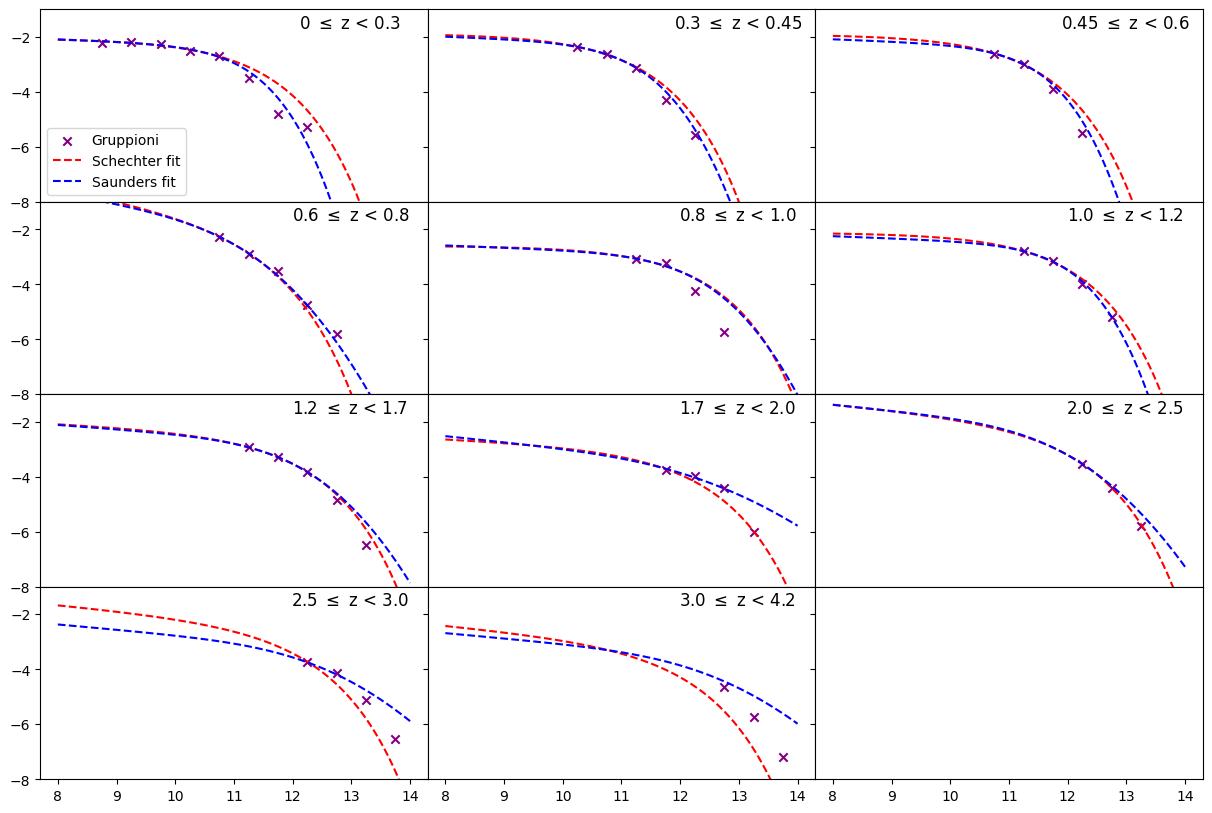

In [7]:
fig, axes = plt.subplots(4, 3, figsize=(15, 10), sharex=True, sharey=True)
axes = axes.flatten()

for i, (l, p, ax, (z_start, z_end)) in enumerate(zip(G_L, G_P, axes, redshift_bins)):
    p = np.power(10, np.array(p)).tolist()
    
    ax.scatter(l, np.log10(p), color='purple', label='Gruppioni' if i == 0 else '', marker='x')
    ax.set_ylim(-8, -1)
    ax.set_title(f'{z_start} $\leq$ z < {z_end}', y=0.86, x=0.8)
    
    p0 = [11, 1e-3, 1.5]
    bounds = ([8, 1e-6, 1], [14, 1e-1, 2])
    params, covars = curve_fit(free_schechter_luminosity, l, p, p0=p0, bounds=bounds)
    
    x = np.linspace(8, 14, 100)
    ax.plot(x, np.log10(free_schechter_luminosity(x, *params)), color='red', label='Schechter fit', linestyle='--')
    
    p0 = [11, 1e-3, 1.5, 0.5]
    bounds = ([8, 1e-6, 1.2, 0.1], [14, 1e-1, 2, 1])
    params, covars = curve_fit(free_saunders_luminosity, l, p, p0=p0, bounds=bounds)
    print(params)
    
    ax.plot(x, np.log10(free_saunders_luminosity(x, *params)), color='blue', label='Saunders fit', linestyle='--')

axes[0].legend(loc='lower left')
    
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()